In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


In [45]:
df = pd.read_csv("data/StudentsPerformance.csv")


In [46]:
x = df.drop('math score',axis = "columns")
y = df['math score']



In [47]:
num_feature = x.select_dtypes(exclude = "object").columns
cat_feature = x.select_dtypes(include = "object").columns
 

In [48]:
from sklearn.preprocessing import  OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cat_feature),
    ("StandardScaler",numeric_transformer,num_feature)
    ])

In [49]:
x = preprocessor.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
 


In [50]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square


In [53]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighbors Regressor" : KNeighborsRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),


}
model_list = []
r2_list = []

for  i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performence for training set :")
    print("Root mean squared error ", model_train_rmse)
    print("Mean absolute error ",model_train_mae)
    print("R2 score ",model_train_r2)
    print("............................")

    print("Model performance for test set")
    print("Root mean squared error ",model_test_rmse)
    print("Mean absolute error ",model_test_mae)
    print("r2 score ",model_test_r2)
    r2_list.append(model_test_r2)
    print("*" * 35)
    print("\n")


LinearRegression
Model performence for training set :
Root mean squared error  5.3270901441872445
Mean absolute error  4.2694140625
R2 score  0.8741263878535156
............................
Model performance for test set
Root mean squared error  5.418561217155575
Mean absolute error  4.21953125
r2 score  0.8793416671431122
***********************************


Lasso
Model performence for training set :
Root mean squared error  6.593815587795566
Mean absolute error  5.206302661246526
R2 score  0.8071462015863456
............................
Model performance for test set
Root mean squared error  6.519694535667419
Mean absolute error  5.157881810347763
r2 score  0.8253197323627853
***********************************


Ridge
Model performence for training set :
Root mean squared error  5.323324922741654
Mean absolute error  4.264987823725981
R2 score  0.8743042615212909
............................
Model performance for test set
Root mean squared error  5.390387016935638
Mean absolute err

In [55]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ["model_name","R2_score"]).sort_values(by = ["R2_score"],ascending = False)


,model_name,R2_score
2,Ridge,0.880593
0,LinearRegression,0.879342
6,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.851057
4,RandomForestRegressor,0.849663
1,Lasso,0.825320
5,XGBRegressor,0.821589
3,KNeighbors Regressor,0.783813


In [56]:
lin_model = LinearRegression(fit_intercept = True)
lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred) * 100
print("Accuracy of linearregression model is ",score)


Accuracy of linearregression model is  87.93416671431122


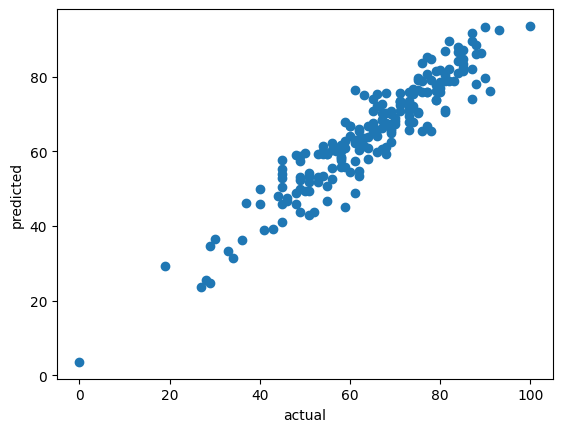

In [57]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

<Axes: xlabel='math score'>

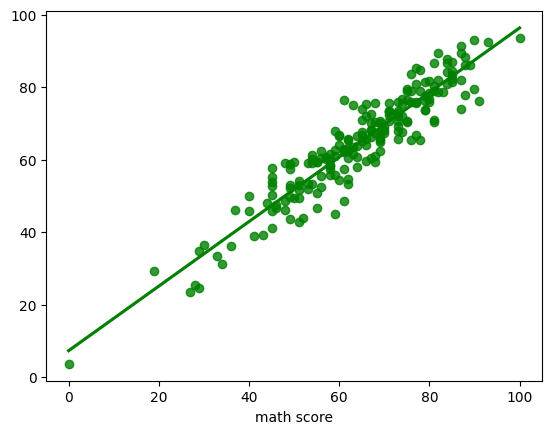

In [58]:
sns.regplot(x = y_test,y = y_pred,ci = None,color = "green")

In [59]:
pred_df = pd.DataFrame({"actual_value":y_test,"predicted_value": y_pred,"difference":y_test - y_pred})
pred_df

,actual_value,predicted_value,difference
521,91,76.21875,14.78125
737,53,59.21875,-6.21875
740,80,76.90625,3.09375
660,74,76.71875,-2.71875
411,84,87.90625,-3.90625
...,...,...,...
408,52,43.81250,8.18750
332,62,62.40625,-0.40625
208,74,67.75000,6.25000
613,65,66.81250,-1.81250
